# Lab 2
Chelsea Zackey
CIS 5526
09/10/2020


## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

**Question 1**: What are we accomplishing with `as` reserved word?

**Answer 1**: Using the reserved word `as`, we are able to use `pd` and `np` as aliases when referencing the packages `pandas` and `numpy` respectively throughout our program.

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [2]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('cars.csv')  # df is DataFrame object
print (df.head())    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  


**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?

**Answer 2**: To instead display the first 10 rows of our table, we can pass a new integer-valued parameter through the `head` method as demonstrated below: 

In [3]:
print(df.head(10)) # display first 10 rows of loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   
5           Ford Galaxie 500  15.0          8         429.0         198   
6           Chevrolet Impala  14.0          8         454.0         220   
7          Plymouth Fury iii  14.0          8         440.0         215   
8           Pontiac Catalina  14.0          8         455.0         225   
9         AMC Ambassador DPL  15.0          8         390.0         190   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433     

**Answer 2 (continued)**: In general, invoking the method `head(n)` while passing an integer parameter of arbitrary value n displays the first n rows of the loaded table. To identify the data types used to store the values recorded for each column, we can call the method `dtypes` as demonstrated below:

In [4]:
print(df.dtypes) #display the data types of each column in table

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object


**Answer 2 (continued)**: Running the above code, we see that the columns **MPG**, **Displacement** and **Acceleration** store 64-bit floating point numbers. **Cylinders**, **Horsepower**, **Weight** and **Model** all store 64-bit integers. Moreover, all of these columns could be considered to store numerical data. The columns **Car** and **Origin** store `object` dtypes, which is the default used to classify columns storing mixed dtypes (in this case, we can say the values of these columns are more specifically stored in strings). Moreover, we can consider these columns to store categorical data.

There are different ways of exploring and indexing the table. Here are some examples.

In [5]:
print (list(df.columns))
print (df[0:5])         # print the first 5 rows, same outcome as df.head()
print (df[['Car', 'MPG']][:10])  # print the first 10 rows for selected columns
print (df[df['MPG'] > 40])   # using Boolean condition, print only cars with MPG > 40
print (df.ix[[0,1,5],0:5])   # uses 'ix' indexing, selects rows and columns based on their location in the table

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  
                         Car   MPG
0  Chevrolet Chevelle Malibu  18.0
1          Buick Skylark 320  15.0
2         Plymouth Satellite  18.0
3              AMC Rebel SST  16.0
4                Ford Torino  1

AttributeError: 'DataFrame' object has no attribute 'ix'

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders.

**Answer 3**:

In [6]:
#Show two ways of printing the last 5 rows of df
print(df.tail()) #method 1: analogous to head method; prints last 5 rows by default
print(df[df.index.stop-5:df.index.stop]) # method 2: indexing by using dataframe index attributes

#Print the names of the cars with 3 cylinders
print(df[df['Cylinders'] == 3]) # use boolean condition to ID matching entries

                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ranger  28.0          4         120.0          79    2625   
405         Chevy S-10  31.0          4         119.0          82    2720   

     Acceleration  Model  Origin  
401          15.6     82      US  
402          24.6     82  Europe  
403          11.6     82      US  
404          18.6     82      US  
405          19.4     82      US  
                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ran

Now, we are ready to start plotting the data.

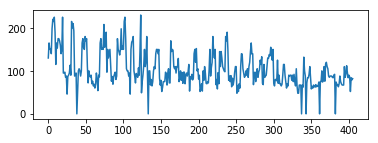

In [7]:
plt.figure(figsize=(6,2))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute

**Question 4**: Plot *Horsepower* attribute, but only for the US cars. 

**Answer 4**:

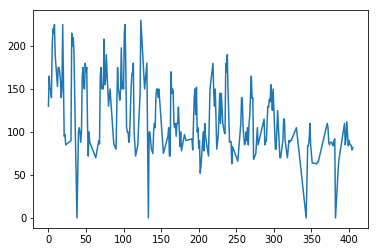

In [8]:
plt.plot(df['Horsepower'][df['Origin'] == 'US']) #plots Horsepower attribute for US cars

To plot the histogram of a selected attribute:

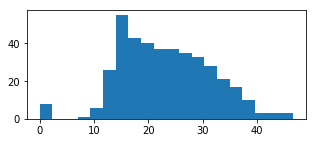

In [90]:
fig = plt.figure(figsize=(5,2))
plt.hist(df['MPG'], bins=20);   # ; suppresses Out
#plt.hist(df['Cylinders'], bins=20) 

#Histograms for Question 13
#fig = plt.figure(figsize=(8, 6))
#plt.hist(df['MPG'][df['Origin']=='US'], bins=20)
#plt.hist(df['MPG'][df['Origin']=='Japan'], bins=20)
#plt.hist(df['MPG'][df['Origin']=='Europe'], bins=20)
#plt.hist(df['Displacement'], bins=20)

**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why. 

**Answer 5**: For the histogram demonstrating the distribution of entries across varying average MPG values, I prefer using a bin count of either 20 or 50 MPG, being all cars fall between an average of 8 to 50 MPG, with < 10 entries appearing to be missing data, reporting an average of 0-2 MPG. That said, the range of possible data outcomes is relatively broad; using 20 bins allows us to categorize entries within a multiple of 2 MPG, while using 50 bins allows us to categorize entries within the nearest whole number MPG. The histogram suggests that there is a peak in the amount of cars with a reported average MPG of roughly 16-17 (just below 50 cars); however, a greater portion of entries report averages between 20 and 40 MPG than that reporting averages between 0 and 20 MPG. 

For the histogram demonstrating the distribution of entries across varying amounts of cylinders, I believe that a bin count of either 10 or 20 is preferrable, being that all car entries are reported to have anywhere between 3 and 8 cylinders, with the highest frequency of cars possessing within 0.25 of the nearest whole number of cylinders. This being the case, using 20 bins allows us to identify this information without spreading the data too thin as the range of all possible data values is relatively narrow. Using 10 bins further simplifies the data by categorizing entries to the nearest half cylinder, which in turn lends greater visibility to the entries that have been otherwise overshadowed when using 20 bins. The histogram suggests that there is a peak in the amount of cars with a reported amount of cylinders between 4 and 4.25 (roughly 200 cars), followed by 7.75-8 cylinders (roughly 100 cars), and 6-6.25 cylinders (roughly 80 cars). In general, all car entries are reported to have anywhere between 3 and 8 cylinders.

The following code provides statistics for number of cylinders.

In [10]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print (t)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.

**Answer 6**: 

In [11]:
# Use crosstab method in a different way on df data
# Compute crosstab demonstrating frequency of each model reported per each country of origin
t2 = pd.crosstab(index=df['Model'], columns=df['Origin'], rownames=['Model:'], colnames=['Origin:'])
print(t2)

Origin:  Europe  Japan  US
Model:                    
70            6      2  27
71            5      4  20
72            5      5  18
73            7      4  29
74            6      6  15
75            6      4  20
76            8      4  22
77            4      6  18
78            6      8  22
79            4      2  23
80            9     13   7
81            5     12  13
82            2      9  20


Horizontal bar plot:

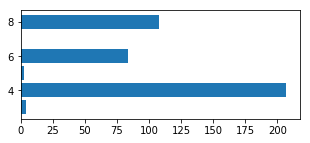

In [12]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"]);

**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?

**Answer 7**: To switch the orientation of the bar plot above, we can call the method `bar` as demonstrated below.

<BarContainer object of 5 artists>

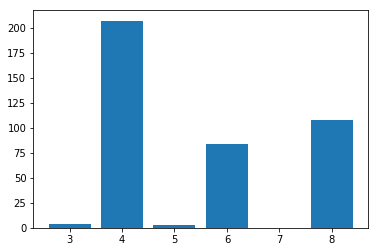

In [101]:
plt.bar(t.index, t["count"]) # Switch orientation of bar plot

#More charts for Question 13
#t3 = pd.crosstab(index=df['Model'][df['MPG']!=0][df['MPG']>=25], columns="count")
#plt.bar(t3.index, t3["count"])

**Answer 7 (continued)**: Likewise, we can control the width of the bars for both plots by passing a new specification for the "width" and "height" parameters into the `bar` and `barh` methods, respectively, as such:

<BarContainer object of 5 artists>

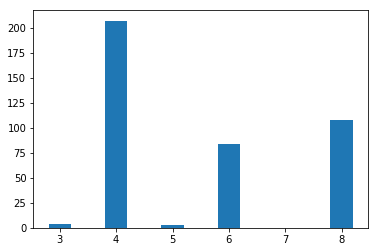

In [14]:
#Create bar plot with thinner bars (less than default value of 0.8)
plt.bar(t.index, t["count"], width=0.4)

<BarContainer object of 5 artists>

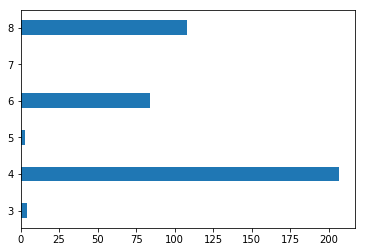

In [15]:
#Create horizontal bar plot with thinner bars (less than default value of 0.8)
plt.barh(t.index,t["count"],height=0.4)

Pie chart:

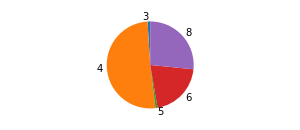

In [102]:
plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(t["count"],labels=t.index,startangle=90);

#More charts for Question 13
#plt.figure(figsize=(8, 6))
#plt.axis("equal")
#plt.pie(t3["count"], labels=t3.index, startangle=90)

**Question 8**: Do you prefer bar or pie displayed chart and why?

**Answer 8**: Ultimately, my preference would depend on the type of analysis or presentation of the data that I aim to accomplish. In other words, if my work is more concerned with the actual frequency occurrence of each category, than I would prefer to use a bar chart; however, if my work is more concerned with relative frequencies within each category considering the data in its entirety, then I would prefer to use a pie chart. 

Overall, in this general case of reviewing the cylinders per each reported car, I would prefer using the pie char as it simplifies the data and tells a more specific story about the data set as a whole by demonstrating the relative portion of entries each category comprises. In this way, we can make more meaningful conclusions, such as reporting that more than half of our entries report having 4 cylinders, as opposed to simply reporting that over 200 entries have 4 cylinders. The latter sentence wouldn't mean much to the general audience without contextualizing it within the data set as a whole. 

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

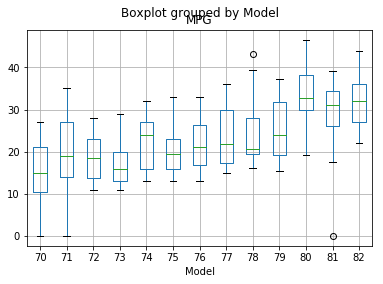

In [17]:
df.boxplot(column='MPG',by='Model');

**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it?

**Answer 9**: The above boxplot allows us to view the standard (and oftentimes most meaningful) MPG statistics generated from all entries categorized by their specified model (i.e., manufacturing year). By "standard", we mean to say that we are able to specifically identify the min, max and median of all reported MPG values per each model category, as well as the 1st and 3rd quartile markers (as well as outliers per each category, indicated by the unfilled circle(s)). 

For example, we see that for all reported cars manufactured in '72, the min MPG value is ~11, the max MPG value is ~27, the median MPG value is ~18, the 1st quartile ends at ~14 MPG, and the 3rd quartile ends at ~23 MPG. Moreover, we can see that there seems to be an outlier entry manufactured in '78 reporting ~43 MPG, as well as a possible missing data point (reporting 0 MPG) for the year '81. In general, we see a steady rise in nearly all of these statistics as the years grow later. 

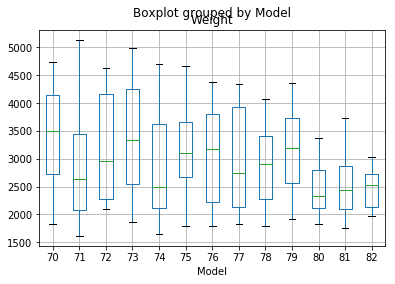

In [111]:
df.boxplot(column='Weight', by='Model')

# More plots for Question 13
#df.boxplot(column='Displacement', by='Model')
#df.boxplot(column='Horsepower', by='Model')
#df.boxplot(column='Acceleration', by='Model')

**Answer 9 (continued)**: The above boxplot mirrors the former boxplot, but instead shows the same statistics generated by the reported weight of all entries per each model category. Here, we see a trend of lighter (presumably smaller) cars being manufactured each successive year, as most statistics display a gradual decrease in value, while the whiskers seem to narrow down in length. This suggests that in later years, manufacturers prioritized efficiency and environmental sustainable in their design of the models released each successive year. Moreover, the narrowing of the whiskers suggest that manufacturers seemed to keep all cars released in a given year relatively more consistent in terms of weight/size. 

Scatterplot between MPG and Weight attributes:

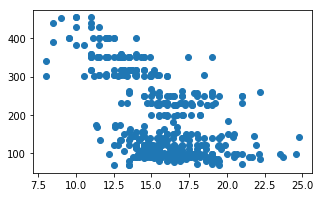

In [107]:
plt.figure(figsize=(5,3))
#plt.scatter(df['MPG'],df['Weight']);
plt.scatter(df['Acceleration'], df['Displacement']);

**Question 10**: Discuss what can we learn from the displayed scatterplot.  

**Answer 10**: In general, the above scatterplot demonstrating the relationship between our MPG and Weight attributes appears to suggest a high negative correlation between the two. In particular, we see a possible exponential decrease in reported weight as reported MPG increases, with the exception of a few outliers that we can presume to be representative of specialized models, such as sports cars. Moreover, we may note the existence of some missing MPG data as suggested by the data points with positive Weight values with a reported MPG of 0. Overall, this trend makes practical sense in the real world, as we can expect lighter (smaller) cars to naturally be more fuel efficient than their heavier (larger) counterparts, as more energy is expended when moving more massive bodies. 

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

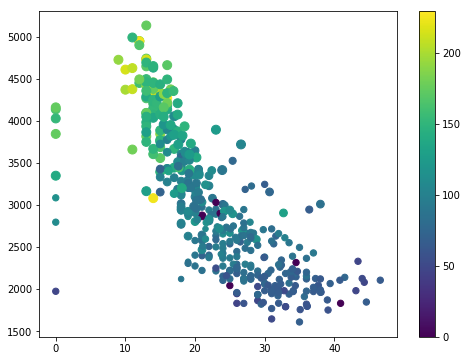

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']*10,df['Horsepower']);
plt.colorbar() #show color map values- CZ

**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.

**Answer 11**: The above scatterplot is a 4 dimensional representation of the relationship between 4 attributes: MPG, Weight, Cylinders and Horsepower. As in the previous scatterplot, the x-axis represents MPG values and the y-axis represents Weight values; by analyzing these two dimensions alone, we see that the same trend in the relationship between MPG and Weight has been preserved (high, negative correlation of exponential nature), as these values have not changed. 

The third dimension of information, demonstrating values for reported Cylinders, is embedded in the diameters of each individual data point: the greater the diameter, the more Cylinders are reported for the data point. Analyzing this dimension in tandem with the first two, we likewise see a positive correlation between Weight and Cylinder, and a negative correlation between MPG and Cylinder. In other words, greater numbers of cylinders are reported for cars of greater weight, which we may presume to be relatively larger as well. In turn, fuel efficiency decreases, as reported by lower values in MPG. 

The fourth dimension of information, demonstrating values for reported Horsepower, is depicted by the color of each individual data point. According to the color map legend, colors tending towards yellow on the standard ROYGBIV spectrum indicate higher values in Horsepower, whereas colors tending towards the violet end of the spectrum indicate lower values in Horsepower (violet points presumably indicating missing data). From this, we see a similar trend as explained above, where we have a positive correlation between Weight, Cylinder and Horsepower, and a negative correlation between MPG and Horsepower. Again, these findings make practical sense in line with manufacturing, design and physics: more massive cars are expected to require higher rates of work and resources to set themselves in motion, which yields greater demands on their engines in the form of increased cylinders, horsepower, and fuel spent powering each mile of travel. 


Below, we share a similar scatterplot that instead demonstrates the relationship between the Model, MPG, Displacement and Horsepower attributes. 

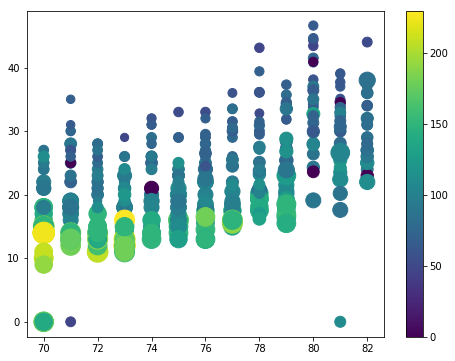

In [32]:
#generate new scatterplot for Model, MPG, Displacement and Horsepower
plt.figure(figsize=(8, 6)) #enlarge figure for Question 13
plt.scatter(df['Model'],df['MPG'],df['Displacement'],df['Horsepower']);
plt.colorbar() #show color map values

# More plots for Question 13
#plt.scatter(df['Model'],df['Weight'],df['Displacement'],df['Horsepower'])
#plt.scatter(df['MPG'],df['Weight'],df['Displacement'],df['Horsepower'])
#plt.scatter(df['Model'], df['MPG'], df['Displacement'], df['Acceleration'])
#plt.colorbar() #show color map values

**Answer 11 (continued)**: Here, the x-axis acts as a timeline representing the Model years from 1970 to 1982 from left to right while the y-axis represents MPG values. The diameter of a given data point measures the relative value of its reported Displacement attribute, with greater diameters indicating greater measures in engine displacement (total volume swept by all pistons in an engine), which is conventionally used as an indicator of the engine's power capacity and fuel consumption. Lastly, the color of a given data point depicts the value of its Horsepower attribute in the same manner as before. 

In summary, as we travel along the timeline demonstrated by our x-axis, we notice that the minimum and maximum reported MPG values for cars of a given Model steadily increase each passing year in a linear fashion. At the same time, we see a strong negative correlation between MPG and Displacement, as the volumes of Displacement significantly shrink with the increase of MPG, as well as the passing of each successive year, as expected based on the previous trend observed with MPG. Moreover, we see a strong positive correlation between reported Horsepower and Displacement, and in turn a strong negative correlation between Horsepower and MPG. In otherwords, this confirms exactly why engine displacement is commonly used as a strong indicator of engine power and fuel economy, as greater engine displacement goes hand in hand with higher horsepower capacity and lesser fuel efficiency. Additionally, we likewise see a decrease in Horsepower in later models, which further demonstrates a narrative of a journey towards more sustainable fuel economy in the years between 1970 and 1982. 

Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

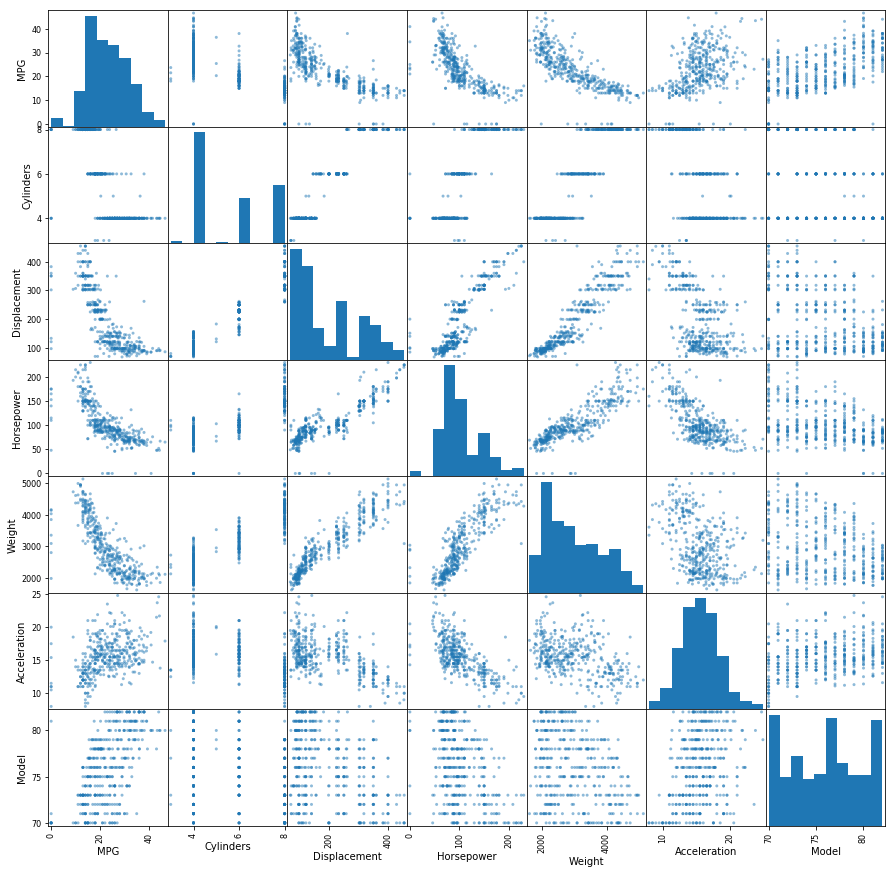

In [88]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.

**Answer 12**: The above `scatter_matrix` provides scatter plots demonstrating the pairwise relationships between each numerical attribute, with the x-axes determined by each column and the y-axes determined by each row. From this, we can develop insights on the correlations between any given pair of attributes reported on our data set. Focusing on the example of the MPG attribute, we see loose positive correlations with the Model and Acceleration attributes, and strong negative correlations with the Weight, Horsepower, Displacement and Cylinders attributes. Essentially this shows us that design and manufacturing (in terms of weight, engine displacement and horsepower capacity) are strong indicators of fuel economy as measured by MPG. The correlation between Model and MPG also suggests that trends in improved fuel economy are not likely to be coincidental, rather the product of a change in priorities within the automotive industry throughout this timeline. Moreover, there is a slight tradeoff between improved fuel economy (higher MPG rates) and performance, as measured by the Acceleration attribute; that is, we see that gains in fuel efficiency has realized longer durations of acceleration from 0 to 60mph. Upon also observing a loose positive correlation between Acceleration and Model, this last detail likewise affirms the conclusion that over the years between 1970- 1982, the automotive industry has gradually placed more importance on fuel efficiency than performance.   
All in all, the pairwise relationships between our numerical attributes displayed in the above `scatter_matrix` allow us to make more accurate judgments when identifying key indicators in causal relationships, such as how design & manufacturing (Weight, Displacement, Cylinders) affect capacity (Horsepower), which in turn affects peformance (Acceleration) and efficiency (MPG). Contextualizing all of this within the timeline provided by the Model attribute then reveals a story about the global economy and politics, among other things, in the language of empirical outcomes.  

When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.

**References**:
    `pandas` API Documentation: https://pandas.pydata.org/docs/reference/index.html
    `matplotlib.pyplot` Documentation: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.html
    